In [ ]:
import sys, os
sys.path.append(os.path.abspath("/Users/DavidHolzwarth/Uni/EPFL/bachelors-thesis"))

import time
import matplotlib.pyplot as plt

import LE as le
import LP as lp
import iterative as iterative
import logger_creator

import graph_tools
import networkx as nx
import numpy as np
import pandas as pd

from concurrent.futures import ProcessPoolExecutor
from scipy.stats import linregress


In [ ]:
range_x = range(0, 200001, 10000)

time_data_le = []
time_data_lp = []
time_data_iterative = []

logger, handler = logger_creator.create_logger("benchmarking")

# Sequential benchmarking
times_le = []
times_lp = []
times_iterative = []

for num_nodes in range_x:
    print(num_nodes)

    G = nx.empty_graph(num_nodes)
    delegations = graph_tools.nx_graph_to_dict(G)
    delegation_graph = graph_tools.prepare_graph(G.nodes(), G.edges())
    delegations_orig = graph_tools.nx_graph_to_dict(delegation_graph)
    delegations = graph_tools.invert_graph(delegations_orig)
    nodes = list(delegation_graph)

    powers_le, sinks_le = le.resolve_delegations(delegations, nodes)
    powers_lp, sinks_lp = lp.resolve_delegations(delegations, nodes)
    powers_iter = iterative.iterate_delegations(delegations, nodes)

    if powers_le.keys() != powers_lp.keys() or any(abs(powers_le[k] - powers_lp[k]) > 1e-4 for k in powers_le):
        logger.error("Powers do not match")
        logger.error(f"LE: {powers_le}")
        logger.error(f"LP: {powers_lp}")
        print("Mismatch LE vs LP")
        break

    for node in sinks_le:
        if abs(powers_lp[node] - powers_iter[node]) >= 0.01:
            logger.error("Powers do not match")
            logger.error(f"LP: {powers_lp}")
            logger.error(f"Iterative: {powers_iter}")
            print("Mismatch LP vs Iterative")
            break

    n = 5
    if 0 <= num_nodes < 50000:
        n = 50
    elif 10000 <= num_nodes < 100000:
        n = 20
    # LE
    le_model = le.set_up(delegations, nodes)
    start = time.time()
    for _ in range(n):
        le.solve(*le_model)
    times_le.append((time.time() - start) / n)

    # LP
    lp_model = lp.set_up(delegations, nodes)
    start = time.time()
    for _ in range(n):
        lp.solve(*lp_model)
    times_lp.append((time.time() - start) / n)

    # Iterative
    start = time.time()
    for _ in range(n):
        _ = iterative.iterate_delegations(delegations, nodes)
    times_iterative.append((time.time() - start) / n)


logger.removeHandler(handler)
handler.close()


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000


KeyboardInterrupt: 

In [24]:
x = list(range_x)
print("x = ", x)
print("times_iterative = ", times_iterative)
print("times_le = ", times_le)
print("times_lp = ", times_lp)

x =  [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000, 370000, 380000, 390000, 400000, 410000, 420000, 430000, 440000, 450000, 460000, 470000, 480000, 490000, 500000, 510000, 520000, 530000, 540000, 550000, 560000, 570000, 580000, 590000, 600000, 610000, 620000, 630000, 640000, 650000, 660000, 670000, 680000, 690000, 700000, 710000, 720000, 730000, 740000, 750000, 760000, 770000, 780000, 790000, 800000, 810000, 820000, 830000, 840000, 850000, 860000, 870000, 880000, 890000, 900000, 910000, 920000, 930000, 940000, 950000, 960000, 970000, 980000, 990000, 1000000, 1010000, 1020000, 1030000, 1040000, 1050000, 1060000, 1070000, 1080000, 1090000, 1100000, 1110000, 1120000, 1130000, 1140000, 1150000, 1160000, 1170000, 1180000, 1190000, 1200000, 1210000, 1220000, 1

In [34]:
x =  [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]
times_iterative =  [6.987571716308593e-05, 0.0004804420471191406, 0.0007567405700683594, 0.001223921775817871, 0.001542220115661621, 0.0025170087814331056, 0.003030252456665039, 0.003697407245635986, 0.0036849021911621095, 0.005345594882965088, 0.005949783325195313, 0.006828784942626953, 0.006362628936767578, 0.0075647830963134766, 0.008676433563232422, 0.009094619750976562, 0.009439373016357422, 0.010360002517700195, 0.018549203872680664, 0.01600618362426758, 0.014511775970458985]
times_le =  [3.4332275390625e-07, 0.0015803813934326173, 0.003237600326538086, 0.0036331844329833985, 0.004751033782958984, 0.006440305709838867, 0.007689297199249268, 0.00846405029296875, 0.009259498119354248, 0.011524593830108643, 0.012787818908691406, 0.016841554641723634, 0.01662898063659668, 0.017364978790283203, 0.01868882179260254, 0.022074460983276367, 0.021744585037231444, 0.023374223709106447, 0.02560701370239258, 0.02753162384033203, 0.040319633483886716]
times_lp =  [0.021134605407714845, 0.11723941802978516, 0.20065715789794922, 0.2926498603820801, 0.3835131597518921, 0.5176193594932557, 0.6077975034713745, 0.7651042461395263, 0.8317034006118774, 0.972295606136322, 1.083059597015381, 1.2202343940734863, 1.3683398246765137, 1.438265037536621, 1.5698322296142577, 1.703148651123047, 1.8536872386932373, 2.0054076671600343, 2.2425836086273194, 2.325029230117798, 2.378593349456787]

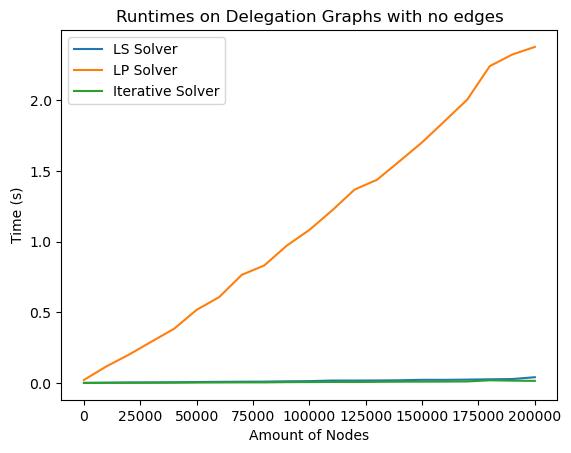

In [35]:
plt.clf()

plt.plot(x, times_le, label=f"LS Solver")
plt.plot(x, times_lp, label=f"LP Solver") 
plt.plot(x, times_iterative, label=f"Iterative Solver")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtimes on Delegation Graphs with no edges")
plt.show()

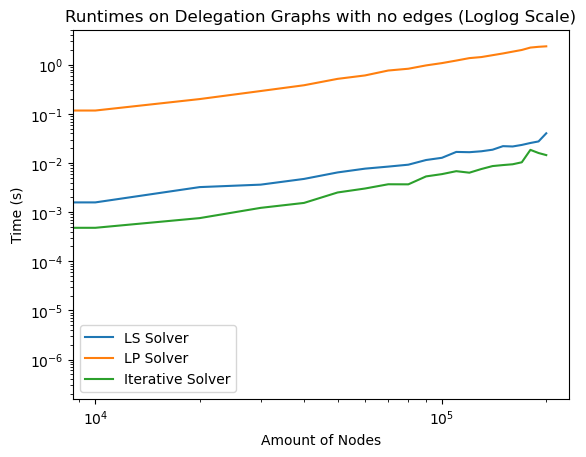

In [36]:
plt.clf()

plt.plot(x, times_le, label=f"LS Solver")
plt.plot(x, times_lp, label=f"LP Solver") 
plt.plot(x, times_iterative, label=f"Iterative Solver")  

plt.legend()
plt.xlabel("Amount of Nodes")
plt.ylabel("Time (s)")
plt.title("Runtimes on Delegation Graphs with no edges (Loglog Scale)")
plt.loglog()
plt.show()

In [ ]:
y = times_le[1:]

results = {}

# 1. Power law: log-log
log_x = np.log(x[1:])
log_y = np.log(y)
slope, intercept, r_value, _, _ = linregress(log_x, log_y)
results['Power law'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 2. Exponential: log-y
slope, intercept, r_value, _, _ = linregress(x[1:], np.log(y))
results['Exponential'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 3. Linear: raw scale
slope, intercept, r_value, _, _ = linregress(x[1:], y)
results['Linear'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 4. Log-linear: log(x) vs. y
slope, intercept, r_value, _, _ = linregress(np.log(x[1:]), y)
results['Log-linear'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

df_results_le = pd.DataFrame(results).T

print("Results for LS:")
display(df_results_le)


y = times_lp[1:]

# Store model fits and R² values
results = {}

# 1. Power law: log-log
log_x = np.log(x[1:])
log_y = np.log(y)
slope, intercept, r_value, _, _ = linregress(log_x, log_y)
results['Power law'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 2. Exponential: log-y
slope, intercept, r_value, _, _ = linregress(x[1:], np.log(y))
results['Exponential'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 3. Linear: raw scale
slope, intercept, r_value, _, _ = linregress(x[1:], y)
results['Linear'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 4. Log-linear: log(x) vs. y
slope, intercept, r_value, _, _ = linregress(np.log(x[1:]), y)
results['Log-linear'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

df_results_lp = pd.DataFrame(results).T

print("Results for LP:")
display(df_results_lp)

y = times_iterative[1:]

# Store model fits and R² values
results = {}

# 1. Power law: log-log
log_x = np.log(x[1:])
log_y = np.log(y)
slope, intercept, r_value, _, _ = linregress(log_x, log_y)
results['Power law'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 2. Exponential: log-y
slope, intercept, r_value, _, _ = linregress(x[1:], np.log(y))
results['Exponential'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 3. Linear: raw scale
slope, intercept, r_value, _, _ = linregress(x[1:], y)
results['Linear'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

# 4. Log-linear: log(x) vs. y
slope, intercept, r_value, _, _ = linregress(np.log(x[1:]), y)
results['Log-linear'] = {'R2': r_value**2, 'slope': slope, 'intercept': intercept}

df_results_iterative = pd.DataFrame(results).T

print("Results for Iterative:")
display(df_results_iterative)

,R2,slope,intercept
Power law,0.976402,1.017335e+00,-15.994444
Exponential,0.924607,1.359976e-05,-5.898946
Linear,0.927550,1.616567e-07,-0.001997
Log-linear,0.731123,1.044762e-02,-0.103364


,R2,slope,intercept
Power law,0.995079,1.052543,-12.012441
Exponential,0.902180,0.000014,-1.535766
Linear,0.994709,0.000012,-0.100581
Log-linear,0.826572,0.818041,-8.072210


,R2,slope,intercept
Power law,0.975043,1.227638e+00,-19.271299
Exponential,0.911172,1.630278e-05,-7.077482
Linear,0.889626,8.189882e-08,-0.001818
Log-linear,0.683162,5.224356e-03,-0.052396


0